In [37]:
%matplotlib inline
import numpy as np

data2=np.loadtxt('D:/number_recognizer/test15.txt')
target2=np.loadtxt('D:/number_recognizer/target15.txt')

print(data2.shape)
print(target2.shape)

(1212L, 64L)
(1212L,)


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn import datasets, svm, metrics

target2 = target2.astype(int)
#data = digits.images.reshape((n_samples, -1))
data = data2
#data = data2[:,np.nonzero(rfe.ranking_ < 10)[0]]
n_samples = len(target2)


#classifier = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
#classifier = svm.SVC(gamma=0.0013)
classifier = svm.SVC(gamma=0.0013)



accu = np.mean(cross_val_score(classifier, data2, target2, cv=StratifiedKFold(target2, 3)))

#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
#classifier.fit(data[:n_samples / 3], target2[:n_samples / 3])


print (accu)

0.704665915469


In [52]:
for g in range(0,100):
    classifier = svm.SVC(gamma = g / 10000.)
   # print(cross_val_score(classifier, X, y, cv=StratifiedKFold(y, 5)))
    print(np.mean(cross_val_score(classifier, X, y, cv=StratifiedKFold(y ,5))))

[ 0.1504065   0.14285714  0.13636364  0.20833333  0.19665272]
0.166922667257
[ 0.59756098  0.58367347  0.52479339  0.74583333  0.65271967]
0.620916166407
[ 0.6300813   0.62040816  0.5661157   0.78333333  0.66945607]
0.653878913367
[ 0.66666667  0.65714286  0.59917355  0.82083333  0.69456067]
0.687675416064
[ 0.7195122   0.67346939  0.6322314   0.84166667  0.71548117]
0.71647216521
[ 0.71544715  0.69795918  0.63636364  0.84583333  0.71129707]
0.721380075794
[ 0.72357724  0.70612245  0.64049587  0.85        0.72384937]
0.728808984981
[ 0.7398374   0.71428571  0.65289256  0.85416667  0.72384937]
0.737006342739
[ 0.75609756  0.71836735  0.64876033  0.85        0.72803347]
0.740251742259
[ 0.75203252  0.71428571  0.65289256  0.84166667  0.73640167]
0.73945582738
[ 0.75203252  0.73061224  0.65289256  0.84166667  0.73640167]
0.742721133503
[ 0.75203252  0.73061224  0.65289256  0.84583333  0.74058577]
0.74439128692
[ 0.75609756  0.74285714  0.65702479  0.85        0.73640167]
0.748476234172
[ 

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn import datasets, svm, metrics

target2 = target2.astype(int)
#data = digits.images.reshape((n_samples, -1))
data = data2
#data = data2[:,np.nonzero(rfe.ranking_ < 10)[0]]
n_samples = len(target2)


#classifier = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
classifier = svm.SVC(gamma=0.0013)


classifier.fit(data[:n_samples / 3], target2[:n_samples / 3])




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0013, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Optimal number of features : 46


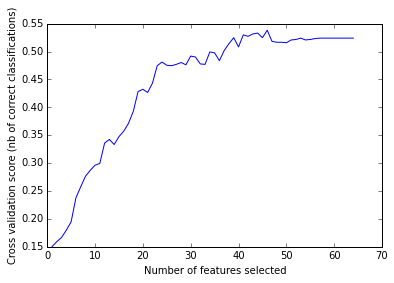

In [55]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = data2
y = target2

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [56]:
from sklearn import metrics
expected = target2[n_samples / 3:]
predicted = rfecv.predict(data2[n_samples / 3:])



print("Classification report for classifier %s:\n%s\n"
    % (rfecv, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

Classification report for classifier RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 2 ..., 9 0], n_folds=2, shuffle=False, random_state=None),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   estimator_params=None, scoring='accuracy', step=1, verbose=0):
             precision    recall  f1-score   support

          0       0.87      0.82      0.84        94
          1       0.87      0.97      0.92        79
          2       0.84      0.90      0.87        86
          3       0.87      0.82      0.85        91
          4       0.90      0.93      0.92        71
          5       0.84      0.79      0.82        78
          6       0.82      0.82      0.82        72
          7       0.83      0.79      0.81        87
          8       0.92      0.89      0.90        63
          9       0.84      0.86      0.8

In [48]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine3.pkl") 

['./machine3.pkl',
 './machine3.pkl_01.npy',
 './machine3.pkl_02.npy',
 './machine3.pkl_03.npy',
 './machine3.pkl_04.npy',
 './machine3.pkl_05.npy',
 './machine3.pkl_06.npy',
 './machine3.pkl_07.npy',
 './machine3.pkl_08.npy',
 './machine3.pkl_09.npy',
 './machine3.pkl_10.npy',
 './machine3.pkl_11.npy']